In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.utils import shuffle

### Spliting Data

In [2]:
# === Loading Data ===
iris = load_iris()
iris_X = iris.data
iris_y = iris.target

iris_X, iris_y = shuffle(iris_X, iris_y, random_state=134)

X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.3, random_state=42)

### Building Models 

In [3]:
def display_plt(clf, y_pred):
    fig, axes = plt.subplots(figsize=(15, 5)) 
    matrix_confusion = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d')
    plt.show()

In [4]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf = rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

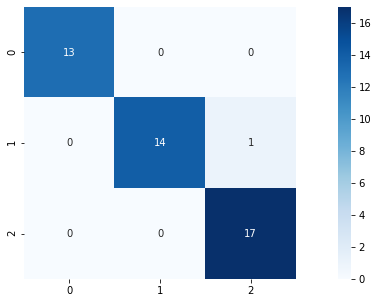

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [5]:
display_plt(rf_clf, y_pred)
print(classification_report(y_test, y_pred))

### Feature Importance 

In [6]:
rf_clf.feature_importances_

array([0.11001804, 0.02804557, 0.43543954, 0.42649685])

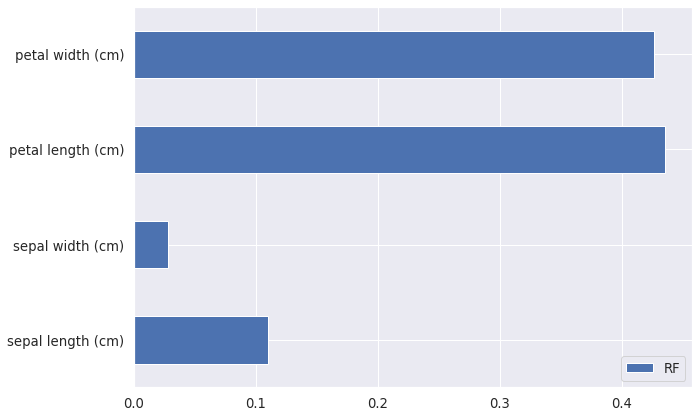

In [7]:
sns.set(rc={'figure.figsize': [10, 7]}, font_scale=1.2)
df = pd.DataFrame({'RF': rf_clf.feature_importances_}, index=iris.feature_names)
ax = df.plot.barh()

In [8]:
# === Removing the least importanat feature === 
# === Removing index (1) "sepal width (cm)", which has the lowest score "0.02804557"
np.delete(X_train, 1, axis=1)

array([[4.6, 1.4, 0.3],
       [4.9, 1.4, 0.2],
       [6.3, 4.4, 1.3],
       [5.4, 1.5, 0.2],
       [5. , 1.5, 0.2],
       [4.9, 1.4, 0.1],
       [5.2, 1.4, 0.2],
       [5.7, 1.7, 0.3],
       [6.7, 4.4, 1.4],
       [6.3, 5.6, 2.4],
       [5.8, 4. , 1.2],
       [5.6, 4.1, 1.3],
       [6.7, 5.7, 2.5],
       [6.4, 5.3, 1.9],
       [5.6, 3.6, 1.3],
       [5.1, 1.9, 0.4],
       [5. , 1.4, 0.2],
       [6.9, 5.1, 2.3],
       [5.8, 3.9, 1.2],
       [4.3, 1.1, 0.1],
       [6.8, 5.9, 2.3],
       [4.9, 1.5, 0.2],
       [5.6, 4.9, 2. ],
       [5.4, 1.7, 0.4],
       [6.5, 5.1, 2. ],
       [6.2, 4.5, 1.5],
       [6. , 4. , 1. ],
       [5.7, 4.5, 1.3],
       [6. , 4.5, 1.6],
       [6.4, 5.6, 2.2],
       [5.2, 3.9, 1.4],
       [6.9, 5.7, 2.3],
       [6.7, 5.8, 1.8],
       [6.7, 4.7, 1.5],
       [6.9, 4.9, 1.5],
       [5.1, 1.5, 0.3],
       [6.4, 5.5, 1.8],
       [7.9, 6.4, 2. ],
       [7.4, 6.1, 1.9],
       [4.8, 1.6, 0.2],
       [5.4, 4.5, 1.5],
       [6.1, 5.6

In [9]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf = rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

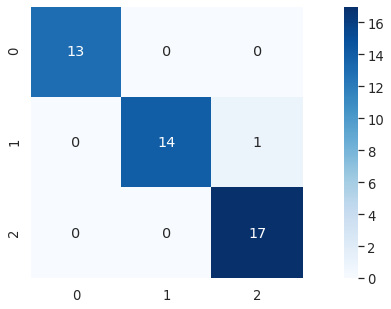

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [10]:
display_plt(rf_clf, y_pred)
print(classification_report(y_test, y_pred))

- Same accuracy score "0.98" before and after removing the lowest importance feature